# K-means algo

K Means Clustering is an unsupervised machine learning algorithm.
It takes in mixed data and divides the data into small groups/clusters based on the patterns in the data.

# K Means Clustering Algorithm Explained

First of all, we will choose the number of clusters (k)(In this case k=2). What this means is that now we will assume 2 points
randomly, they will act as our cluster centroids. (Cluster centroid is the center point of a cluster).

There are two main steps in K Means Clustering:
    
1. Cluster Assignment Step: In this step, the data points that are close to the centroids will fall in those centroids clusters
respectively.
2. Move Centroid Step: In this step, we will compute the mean of all data points in a cluster and move the centroid of that 
cluster to that mean position.

We will repeat the above two steps once one of the following conditions is true:
1. Our centroids stop changing their positions.
2. Maximum number of iterations are reached.
Our data is now arranged into clusters.

# Choosing a value of K

To choose the numbers of clusters that suits our data well, we can use the famous Elbow Method. The basic idea behind this Elbow Method is that it plots various values of cost (error) with a changing number of clusters (k). As the number of clusters (k) increases, the number of data points per cluster decreases. Hence average distortion decreases. The lesser the number of data points in a cluster, the closer these data points are to their centroids. So, the value of k where distortion declines the most is called Elbow Point

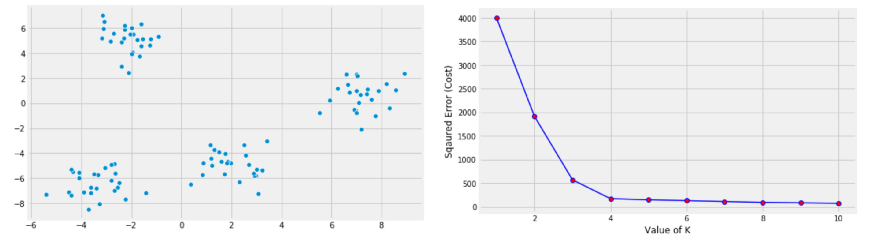

Sometimes the slope of our graph is pretty smooth so it is hard to choose the value of k because there is no clear elbow point. In that case, we use our industry experience and continuous experimentation to determine the value of k.

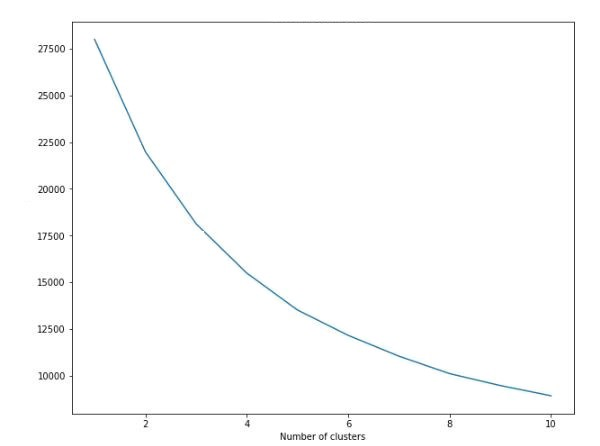

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2,centers=4, cluster_std=1.8,random_state=101)

In [22]:
df=pd.DataFrame(data)

In [16]:
type(data)

tuple

In [32]:
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [33]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

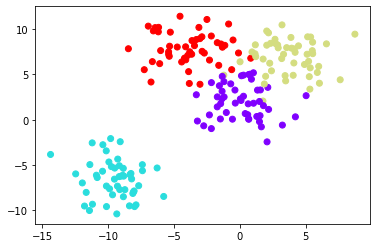

In [41]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Creating Clusters

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now, after importing KMeans from sklearn.cluster , we make an object kmeans of our KMeans class. Here, one thing you may find odd is that we have specified n_clusters=4 . This is because while creating the data we specified centers=4 , so we know that this data should have 4 clusters. So we’ve specified it manually. But if we didn't know about the centers, then we would have to use Elbow Method to determine the correct number of clusters.

Okay, so moving forwards now, this kmeans.fit(data[0]) piece of our code analyses the data, makes the clusters, and even fits the centroids of every cluster to their appropriate position.

In [44]:
# Now in order to check the position of our centroids, we can use the following code.
print(kmeans.cluster_centers_)

[[-0.0123077   2.13407664]
 [-9.46941837 -6.56081545]
 [-4.13591321  7.95389851]
 [ 3.71749226  7.01388735]]


# Comparing Original dataset VS after applying K Means

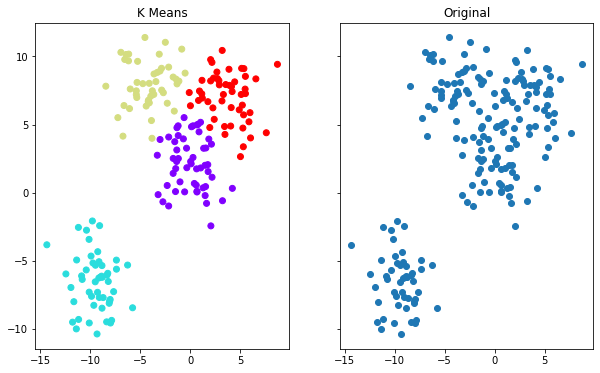

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1])